# CardioSense

## Projeto

Este projeto foi realizado como atividade no curso de pós-gradução em Engenharia de Software pela PUC-Rio.

## Configuração do ambiente

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

## Carga do Dataset

O dataset contém informações sobre vários pacientes, com cada registro representando uma pessoa. As variáveis incluem características médicas, medidas de saúde e a presença ou ausência de doença cardíaca. A última coluna, target, indica se a paciente tem doença cardíaca (1) ou não (0).

Descrição de Cada Coluna
- age: Idade do paciente
- sex: Sexo do paciente (1 = masculino, 0 = feminino)
- cp: Tipo de dor no peito (0: Angina típica, 1: Angina atípica, 2: Dor não anginosa, 3: Assintomático)
- trestbps: Pressão arterial em repouso (em mm Hg)
- chol: Colesterol sérico (em mg/dl).
- fbs: Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso)
- restecg: Resultados do eletrocardiograma em repouso: (0: Normal, 1: Anormalidade na onda ST-T, 2: Hipertrofia ventricular esquerda provável ou definitiva)
- thalach: Frequência cardíaca máxima alcançada
- exang: Angina induzida por exercício (1 = sim, 0 = não)
- oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso
- slope: Inclinação do segmento ST no pico do exercício (0: Ascendente, 1: Plano, 2: Descendente)
- ca: Número de vasos principais (0-3) coloridos por fluoroscopia
- thal: Talassemia (0: Normal, 1: Defeito fixo, 2: Defeito reversível)
- target: Diagnóstico de doença cardíaca (1 = presença de doença, 0 = ausência de doença)

O objetivo é prever se um paciente tem doença cardíaca ou não baseado em suas características médicas.

In [ ]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/Dev3rt0n/MVP_PUC_CardioSense_BackEnd/refs/heads/main/MachineLearning/data/test_dataset_cardiosense.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.834667 (0.052513)
KNN: 0.636333 (0.084741)
CART: 0.793333 (0.078436)
NB: 0.826000 (0.100519)
SVM: 0.636167 (0.078881)
Bagging: 0.809833 (0.083837)
RF: 0.821833 (0.065547)
ET: 0.821500 (0.091940)
Ada: 0.764167 (0.100836)
GB: 0.813833 (0.077796)
Voting: 0.793167 (0.062323)


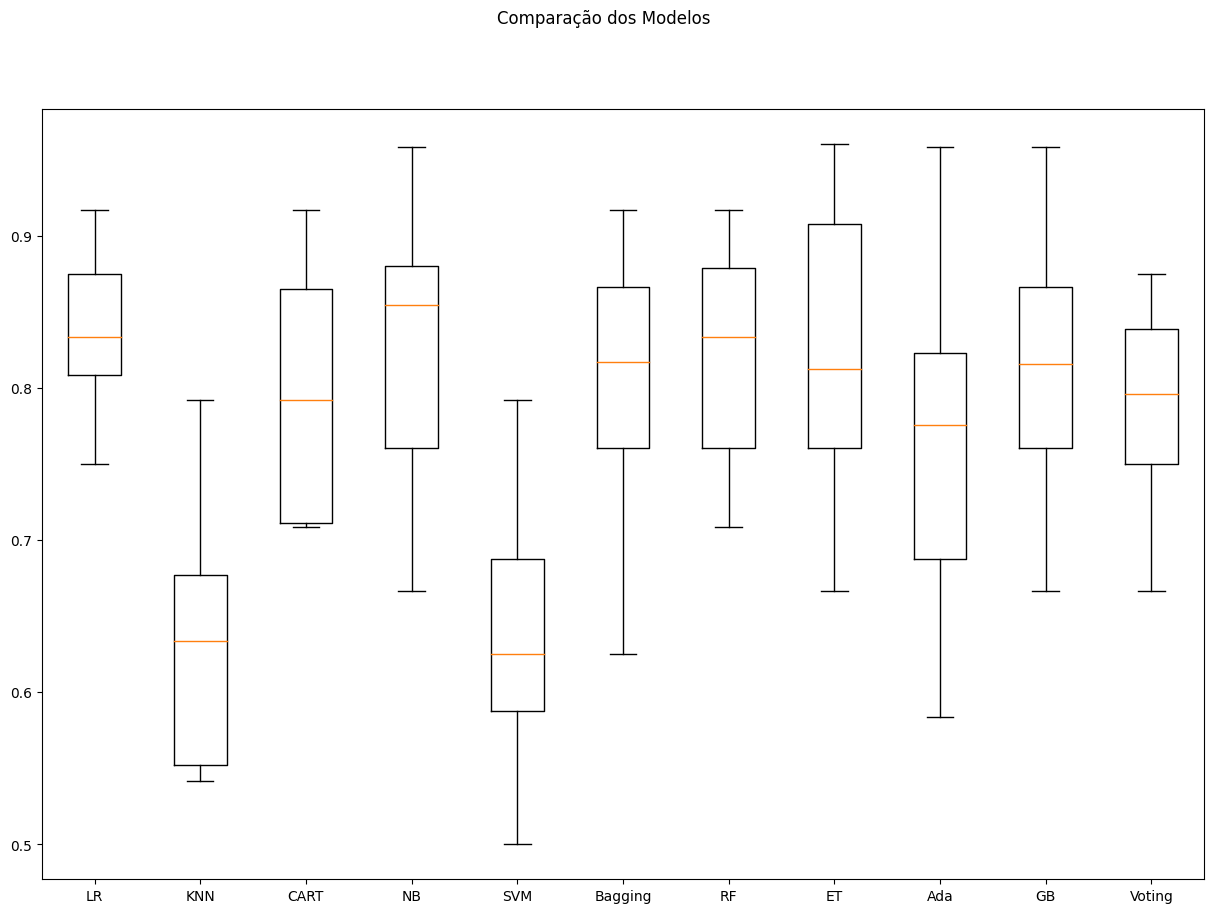

' O melhor modelo é o LR (Regressão Logística), com uma média de 0.834667 e um desvio padrão de 0.052513\n    Os outros modelos que também se destacam são:\n       * RF (Random Forest): 0.821833 (0.065547)\n       * NB (Naive Bayes): 0.826000 (0.100519)\n'

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

''' O melhor modelo é o LR (Regressão Logística), com uma média de 0.834667 e um desvio padrão de 0.052513
    Os outros modelos que também se destacam são:
       * RF (Random Forest): 0.821833 (0.065547)
       * NB (Naive Bayes): 0.826000 (0.100519)
'''

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.835 (0.053)
KNN-orig: 0.636 (0.085)
CART-orig: 0.793 (0.078)
NB-orig: 0.826 (0.101)
SVM-orig: 0.636 (0.079)
Bag-orig: 0.810 (0.084)
RF-orig: 0.822 (0.066)
ET-orig: 0.822 (0.092)
Ada-orig: 0.764 (0.101)
GB-orig: 0.814 (0.078)
Vot-orig: 0.793 (0.062)
LR-padr: 0.822 (0.059)
KNN-padr: 0.810 (0.073)
CART-padr: 0.785 (0.065)
NB-padr: 0.826 (0.101)
SVM-padr: 0.825 (0.093)
Bag-padr: 0.830 (0.093)
RF-padr: 0.822 (0.056)
ET-padr: 0.830 (0.076)
Ada-padr: 0.764 (0.101)
GB-padr: 0.810 (0.086)
Vot-padr: 0.822 (0.054)
LR-norm: 0.818 (0.084)
KNN-norm: 0.830 (0.072)
CART-norm: 0.789 (0.087)
NB-norm: 0.826 (0.101)
SVM-norm: 0.846 (0.088)
Bag-norm: 0.805 (0.097)
RF-norm: 0.826 (0.077)
ET-norm: 0.813 (0.100)
Ada-norm: 0.764 (0.101)
GB-norm: 0.802 (0.089)
Vot-norm: 0.826 (0.070)


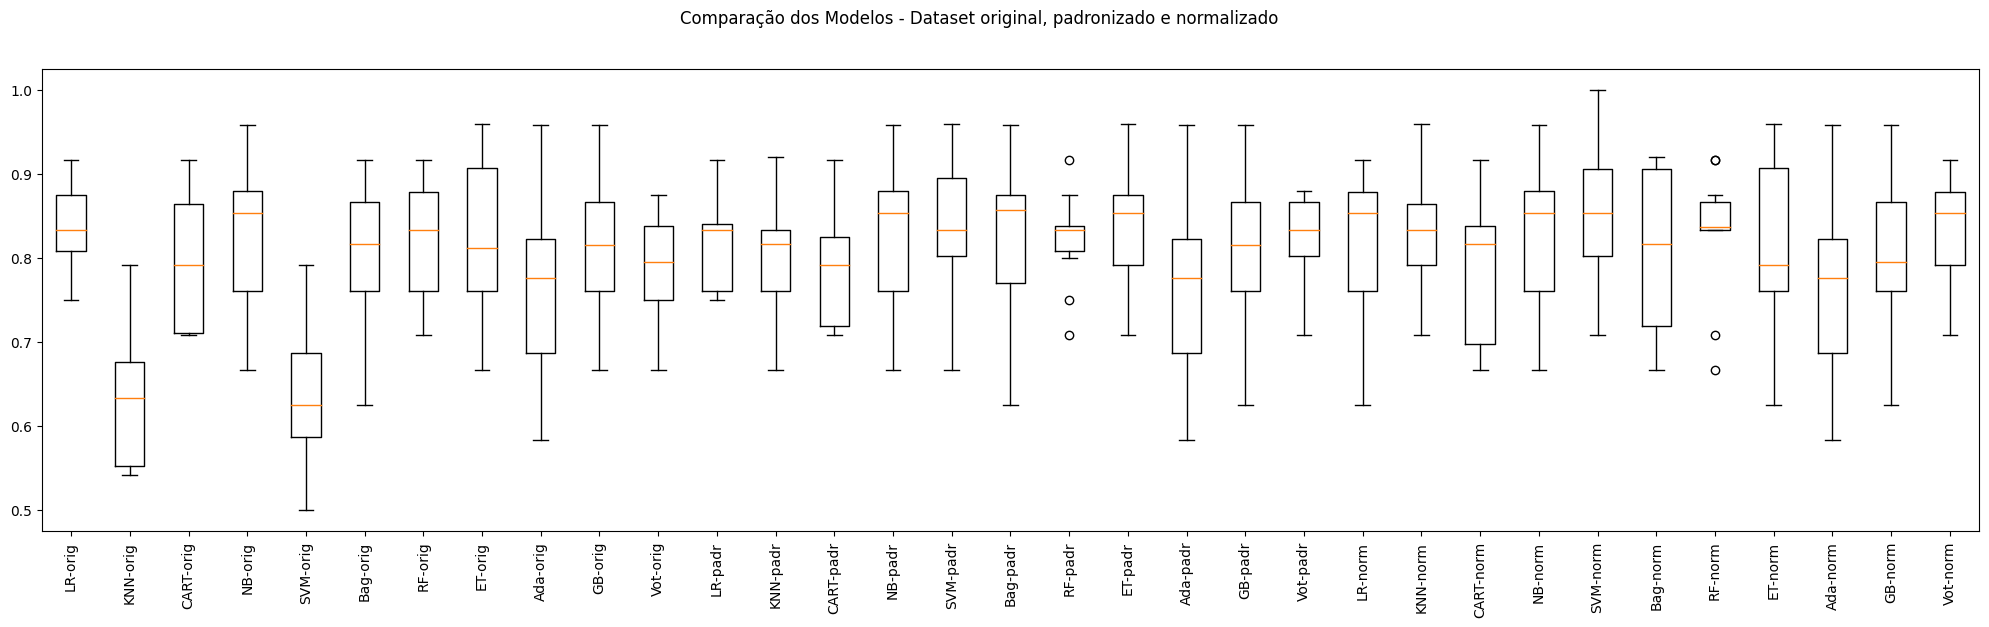

'\n    O melhor desempenho é apresentado pelo SVM-norm, com uma média de 0.846 e um desvio padrão de 0.088\n    Outros modelos que também apresentam um bom desempenho são:\n        * LR-orig: 0.835 (0.053)\n        * ET-padr: 0.830 (0.076)\n        * KNN-norm: 0.830 (0.072)\n'

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

'''
    O melhor desempenho é apresentado pelo SVM-norm, com uma média de 0.846 e um desvio padrão de 0.088
    Outros modelos que também apresentam um bom desempenho são:
        * LR-orig: 0.835 (0.053)
        * ET-padr: 0.830 (0.076)
        * KNN-norm: 0.830 (0.072)
'''

## Otimização dos hiperparâmetros

In [ ]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

    '''
        Tempo de processamento: 26 minutos
        O ET-padr (Extra Trees) se destaca como o melhor, alcançando um desempenho de 0.876020 com a configuração ótima indicada
        Outros modelos que também apresentaram bons resultados incluem:
              * RF-orig (Random Forest): 0.863861
              * RF-padr: 0.859524
              * RF-norm: 0.859524
              * SVM-norm: 0.851276
              * KNN-padr: 0.855272
    '''

Modelo: LR-orig - Melhor: 0.847194 usando {'LR__C': 0.1, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.847194 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.843027 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.694048 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Modelo: KNN-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: KNN-norm - Melhor: 0.843027 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Modelo: CART-orig - Melhor: 0.822279 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
Modelo: CART-padr - Melhor: 0.822279 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.813946 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
Modelo: NB-orig - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
Mode

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.694048 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-norm - Melhor: 0.843027 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RF-padr - Melhor: 0.684923 usando {'RF__max_depth': 30, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.819672131147541


In [ ]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.819672131147541


## Salvando os arquivos

In [ ]:
# Salvando o modelo
# Salvando o modelo
model_filename = 'rf_cardiosense_classifier.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_cardiosense.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'rf_cardiosense_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("X_test_dataset_cardiosense.csv", index=False)
y_test_df.to_csv("y_test_dataset_cardiosense.csv", index=False)

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [ ]:
# Novos dados - não sabemos a classe.
data = {'age': [63, 37, 57, 57],
        'sex': [1, 1, 1, 0],
        'cp': [3, 2, 0, 1],
        'trestbps': [145, 130, 130, 130],
        'chol': [233, 250, 131, 236],
        'fbs': [1, 0, 0, 0],
        'restecg': [0, 1, 1, 0],
        'thalach': [150, 187, 115, 174],
        'exang': [0, 0, 1, 0],
        'oldpeak': [2.3, 3.5, 1.2, 0],
        'slope': [0, 0, 1, 1],
        'ca': [0, 0, 1, 1],
        'thal': [1, 2, 3, 2]
        }

atributos = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.70833333 1.         1.         0.48113208 0.24429224 1.
  0.         0.60305344 0.         0.37096774 0.         0.
  0.33333333]
 [0.16666667 1.         0.66666667 0.33962264 0.28310502 0.
  0.5        0.88549618 0.         0.56451613 0.         0.
  0.66666667]
 [0.58333333 1.         0.         0.33962264 0.01141553 0.
  0.5        0.33587786 1.         0.19354839 0.5        0.25
  1.        ]
 [0.58333333 0.         0.33333333 0.33962264 0.25114155 0.
  0.         0.78625954 0.         0.         0.5        0.25
  0.66666667]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 0. 0.]
